In [1]:
import numpy as np
import math
import lasio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
las = lasio.read("Ichthys-2AST2_S3R5_UBI_DSI_EMS_COMPOSED_042PUC.las")
lass = lasio.read("Ichthys-2AST2_S3R1_OBMI-AIT-LDT-LDS-APS-HNGS_MainRaw_LUC.las")

Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files


In [3]:
las1 =las.df()
las2 = lass.df()

In [4]:
las1.head()

,BS:1,CS:1,TENS:1,ETIM:1,DCAL:1,FCD:1,HDAR:1,ELA:1,ESA:1,ERA:1,...,RD4:3,RD5:3,RD6:3,TIME:4,IHV:3,ICV:3,ED:3,ND:3,TVDE:3,FNOR:3
DEPTH,,,,,,,,,,,,,,,,,,,,,
3967.7340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3967.8864,8.5,3046.56298,5900.0,9113.78222,0.295107,7.0,8.795107,8.872300,8.764937,62.942860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3968.0388,8.5,3046.56298,5900.0,9113.78222,0.256381,7.0,8.756381,8.851167,8.698757,47.466721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3968.1912,8.5,3046.56298,5900.0,9113.78222,0.249544,7.0,8.749544,8.849486,8.688128,48.766739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3968.3436,8.5,3046.56298,5900.0,9113.78222,0.252711,7.0,8.752710,8.851507,8.693712,50.615978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
las2.head

<bound method NDFrame.head of             BS           CS     TENS         ETIM      DCAL  FCD      HDAR  \
DEPTH                                                                        
4000.6524  8.5  1845.613030  6418.00  5261.539060  0.299136  7.0  8.799136   
4000.6905  8.5  1846.130490  6426.50  5261.292960  0.299136  7.0  8.799136   
4000.7286  8.5  1846.647940  6435.00  5261.046870  0.299136  7.0  8.799136   
4000.7667  8.5  1847.165520  6443.50  5260.801260  0.299136  7.0  8.799136   
4000.8048  8.5  1847.682980  6452.00  5260.555170  0.299136  7.0  8.799136   
...        ...          ...      ...          ...       ...  ...       ...   
4763.4144  8.5   963.315612  6753.00     1.866500 -3.513000  7.0  4.987000   
4763.4525  8.5   963.579650  6747.25     1.399875 -3.512948  7.0  4.987052   
4763.4906  8.5   963.843750  6741.50     0.933250 -3.512896  7.0  4.987103   
4763.5287  8.5   964.107788  6735.75     0.466625 -3.512844  7.0  4.987155   
4763.5668  8.5   964.371826  6730.

In [6]:
p1=las1.reset_index()
p2=las2.reset_index()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

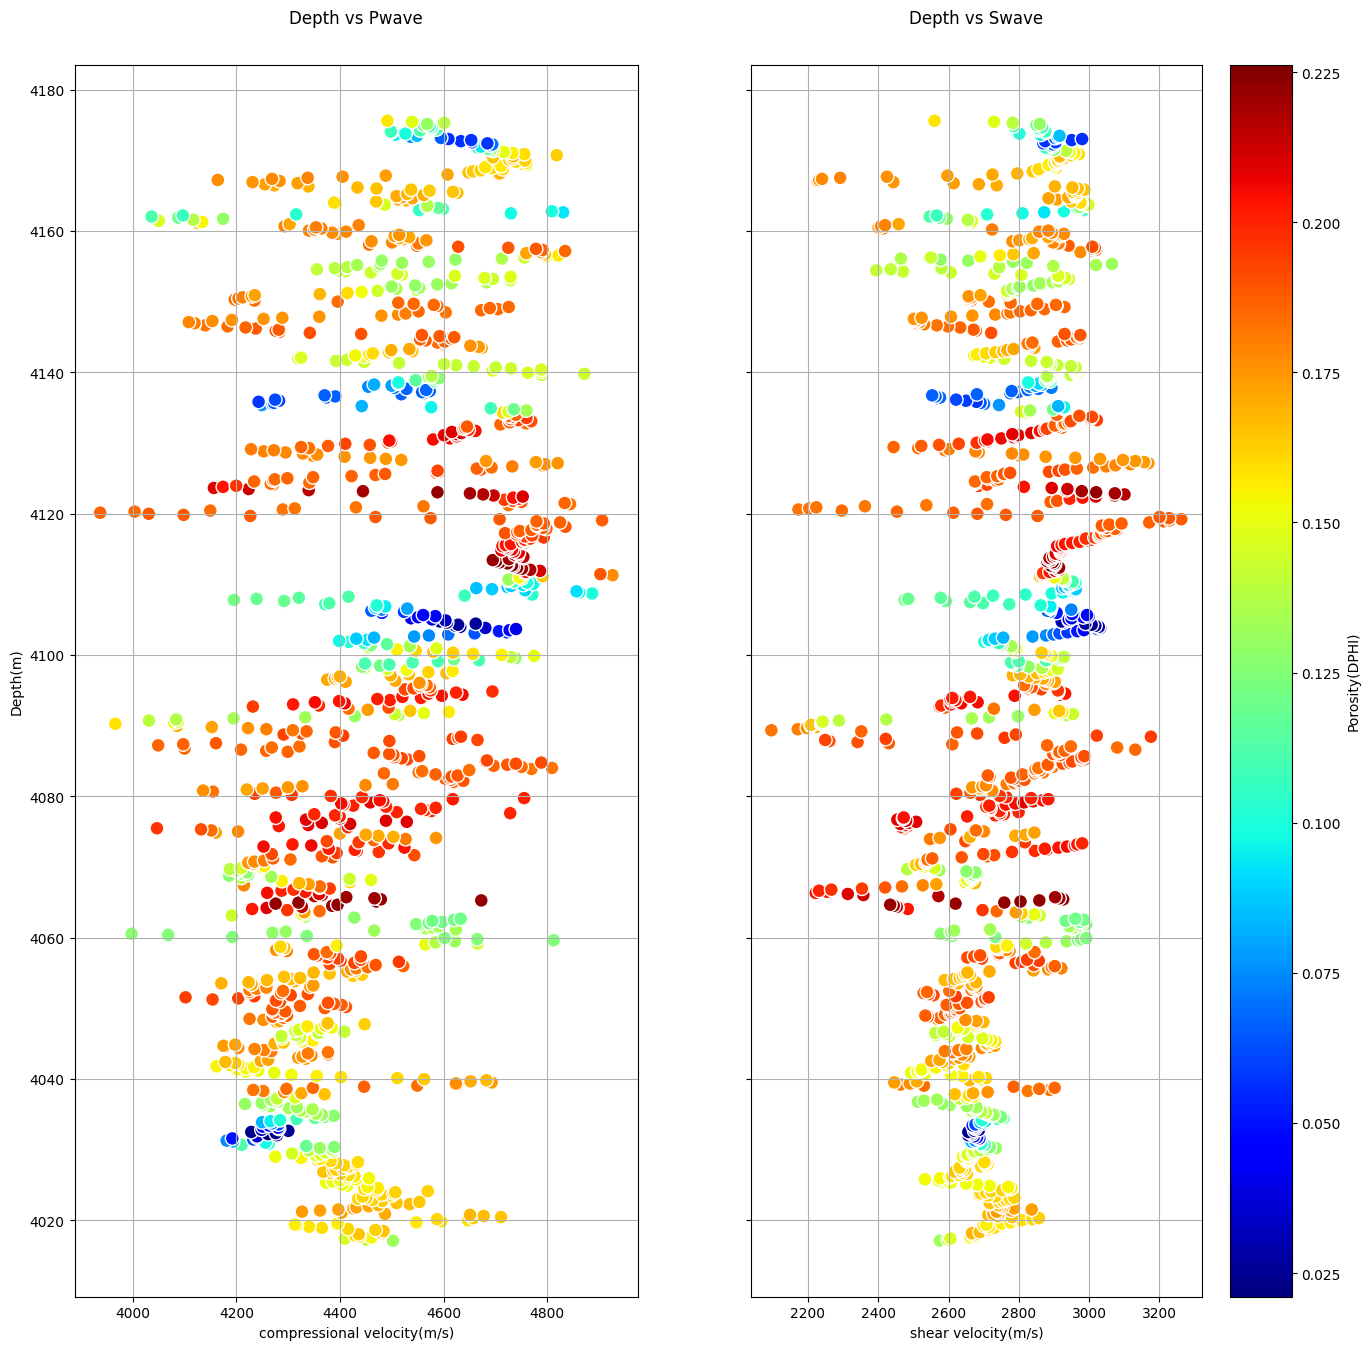

In [7]:
well_1=p1[ 'DEPTH' ][(p1['DEPTH']>=4016.96)&(p1[ 'DEPTH' ]<=4175.61) ]
well_2=p2[ 'DEPTH' ][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61) ]
dt_p=304800/(np.array(p1['DTCO:1' ][(p1[ 'DEPTH' ]>=4016.96)&(p1[ 'DEPTH' ]<=4175.61)]))
dt_s=304800/(np.array(p1['DTSM:1' ][(p1[ 'DEPTH' ]>=4016.96)&(p1[ 'DEPTH' ]<=4175.61)]))
#print(Len(dt_p))
#dt_s=p1[ 'DTSM'][(p1[ ‘DEPTH’ ]>=4016.96)&(p1[ ‘DEPTH’ ]<=4175.61) ]
DPHI=p2[ 'DPHI' ][(p2['DEPTH' ]>=4016.96)&(p2[ 'DEPTH']<=4175.61) ]
por=DPHI[ :len(dt_p) ]
plt.rcParams[ 'figure.figsize' ]=(16,16)
#plt.figure(figsize=(10,16))
plt.subplot(121)
plt.scatter(dt_p,well_1, c =por, marker='o', s=100, edgecolors='w', cmap='jet' )
plt.xlabel('compressional velocity(m/s)'); plt.ylabel('Depth(m)'); plt.grid(True)
plt.title( 'Depth vs Pwave', pad=30);
#pLt.gca().invert_yaxis()
plt.subplot (122)
plt.scatter(dt_s,well_1, c =por, marker='o', s=100, edgecolors='w', cmap='jet')
plt.xlabel('shear velocity(m/s)');
#pLt.yLlabel('Depth(m)');
plt.grid(True)
plt.colorbar(label='Porosity(DPHI)');
plt.rcParams[ 'figure.figsize' ]=(11,11)
plt.title('Depth vs Swave' , pad=30);
plt.tick_params(labelleft=False)
#plt.xlim(85,15@)
#pLt.ylim(400@, 4190)
#pLt.gca().invert_yaxis()
plt.tight_layout

In [8]:
depth_1=p1[ 'DEPTH' ][(p1[ 'DEPTH' ]>=4016.96)&(p1[ 'DEPTH' ]<=4175.61)]
depth_2=p2[ 'DEPTH' ][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61) ]

gr_1=p1['GR:1'][(p1['DEPTH' ]>=4016.96)&(p1[ 'DEPTH' ]<=4175.61)] #
gr_2=p2['HCGR' ][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #HNGS computed gamma rc
NPHI=p2[ 'FPLC' ][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #porosity from enhancec
DPHI=p2[ 'DPHI' ][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #density porosity
Cali=p2['CALI'][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #CALIPER
rhob=p2[ 'RHOB' ][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #BuLk Density
dt_p=304800/((p1['DTCO:1' ][(p1['DEPTH' ]>=4016.96)&(p1[ 'DEPTH' ]<=4175.61)])) #
dt_s=304800/((p1[ 'DTSM:1' ][(p1[ 'DEPTH' ]>=4016.96)&(p1['DEPTH' ]<=4175.61)])) #1
shal_res=p2[ 'ATRX' ][(p2['DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #shaLllow resistivii
deep_res=p2['RT'][(p2[ 'DEPTH' ]>=4016.96)&(p2[ 'DEPTH' ]<=4175.61)] #deep resistivity
depth_1

324     4017.1116
325     4017.2640
326     4017.4164
327     4017.5688
328     4017.7212
          ...    
1360    4174.9980
1361    4175.1504
1362    4175.3028
1363    4175.4552
1364    4175.6076
Name: DEPTH, Length: 1041, dtype: float64

In [9]:
gr5=gr_1.quantile(0.05)
gr95=gr_1.quantile(0.95)
print(np.min(gr_2) )
print(np.max(gr_2))

9.31677818
146.746505


In [10]:
Vsh=np.array((gr_2-gr5)/(gr95-gr5) )
for i in range(len(Vsh)):
    if Vsh[i] <=0:
        Vsh[i]=0
    elif Vsh[i]>=1:
        Vsh[i]=1
    print(Vsh)


[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68831612]
[0.7689735  0.62663936 0.48430521 ... 0.43999339 0.56415476 0.68

In [11]:
#As we are taking Limestone neutron pororsity but the brewster zone is totally
#sandstone bearing zone we need do apply matrix correction
nphi_corr=NPHI+(0.04) #for matrix correction
print(np.min(gr_2) )
print (np.max(DPHI) )


9.31677818
0.31476539


Question 2

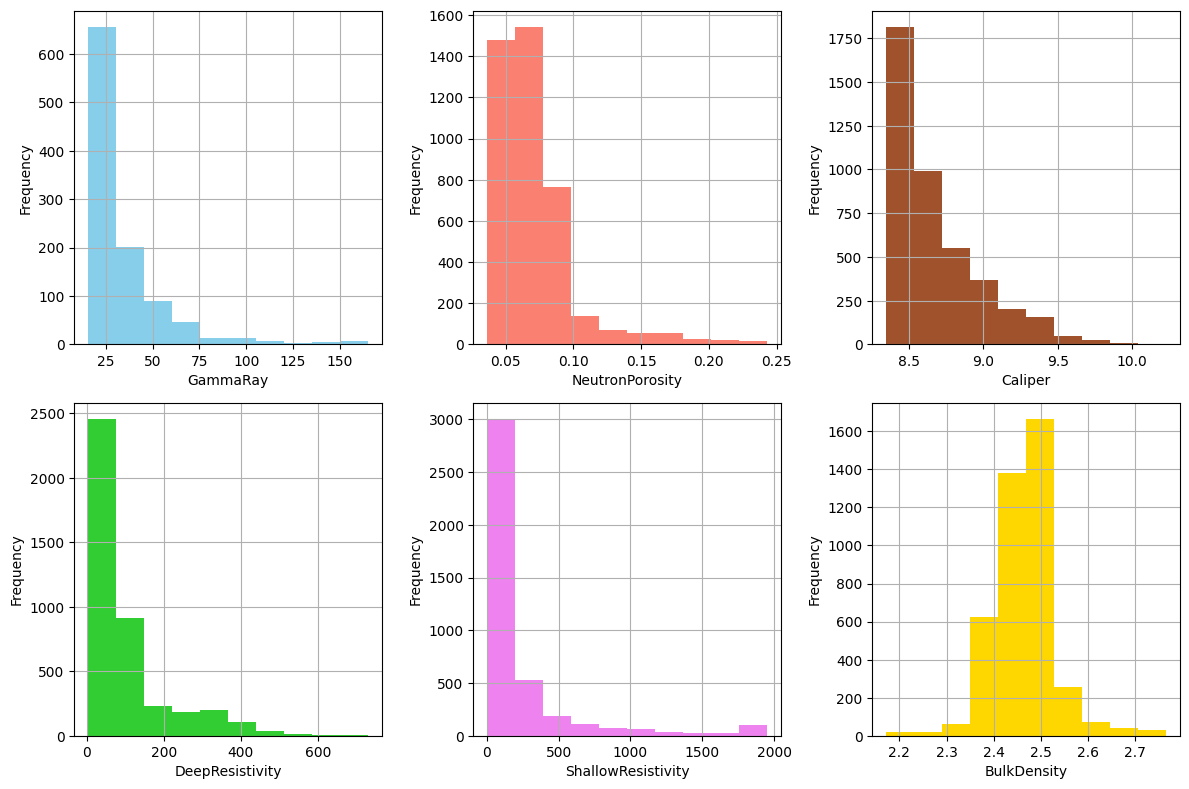

In [12]:
plt.figure(1, figsize=(12, 8))

plt.subplot(231)
plt.hist(gr_1, color='skyblue')  # Change color to sky blue
plt.xlabel('GammaRay')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(232)
plt.hist(NPHI, color='salmon')  # Change color to salmon
plt.xlabel('NeutronPorosity')
plt.ylabel('Frequency')
plt.grid()


plt.subplot(233)
plt.hist(Cali, color='sienna')  # Change color to sienna
plt.xlabel('Caliper')
plt.ylabel('Frequency')
plt.grid()


plt.subplot(234)
plt.hist(deep_res, color='limegreen')  # Change color to lime green
plt.xlabel('DeepResistivity')
plt.ylabel('Frequency')
plt.grid()


plt.subplot(235)
plt.hist(shal_res, color='violet')  # Change color to violet
plt.xlabel('ShallowResistivity')
plt.ylabel('Frequency')
plt.grid()


plt.subplot(236)
plt.hist(rhob, color='gold')  # Change color to gold
plt.xlabel('BulkDensity')
plt.ylabel('Frequency')
plt.grid()


# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('histogram.png', dpi=250)
# plt.grid()

plt.show()


In [13]:

data = {
    'depth': depth_2,
    'gr_2': gr_2,
    'NPHI': NPHI,
    'Cali': Cali,
    'rhob': rhob,
    'shal_res': shal_res,
    'deep_res': deep_res
}
logs_df = pd.DataFrame(data)
logs_df.reset_index()
# logs_df = logs_df.drop(columns=['index'])
logs_df


,depth,gr_2,NPHI,Cali,rhob,shal_res,deep_res
429,4016.9973,61.231613,0.102041,8.535177,2.484471,32.016449,34.748028
430,4017.0354,53.598358,0.096209,8.535251,2.472094,34.567680,40.474403
431,4017.0735,45.965103,0.090377,8.535324,2.459716,38.008110,46.200783
432,4017.1116,38.331848,0.084545,8.535397,2.447338,41.448540,51.927158
433,4017.1497,34.341064,0.083529,8.535324,2.440942,49.092194,60.978439
...,...,...,...,...,...,...,...
4588,4175.4552,30.271370,0.095390,8.465088,2.464580,26.158501,29.043430
4589,4175.4933,36.930035,0.104567,8.463044,2.473814,22.642256,25.714958
4590,4175.5314,43.588699,0.113744,8.461000,2.483048,19.126011,22.386486
4591,4175.5695,50.247364,0.122921,8.458956,2.492283,17.052675,19.058012


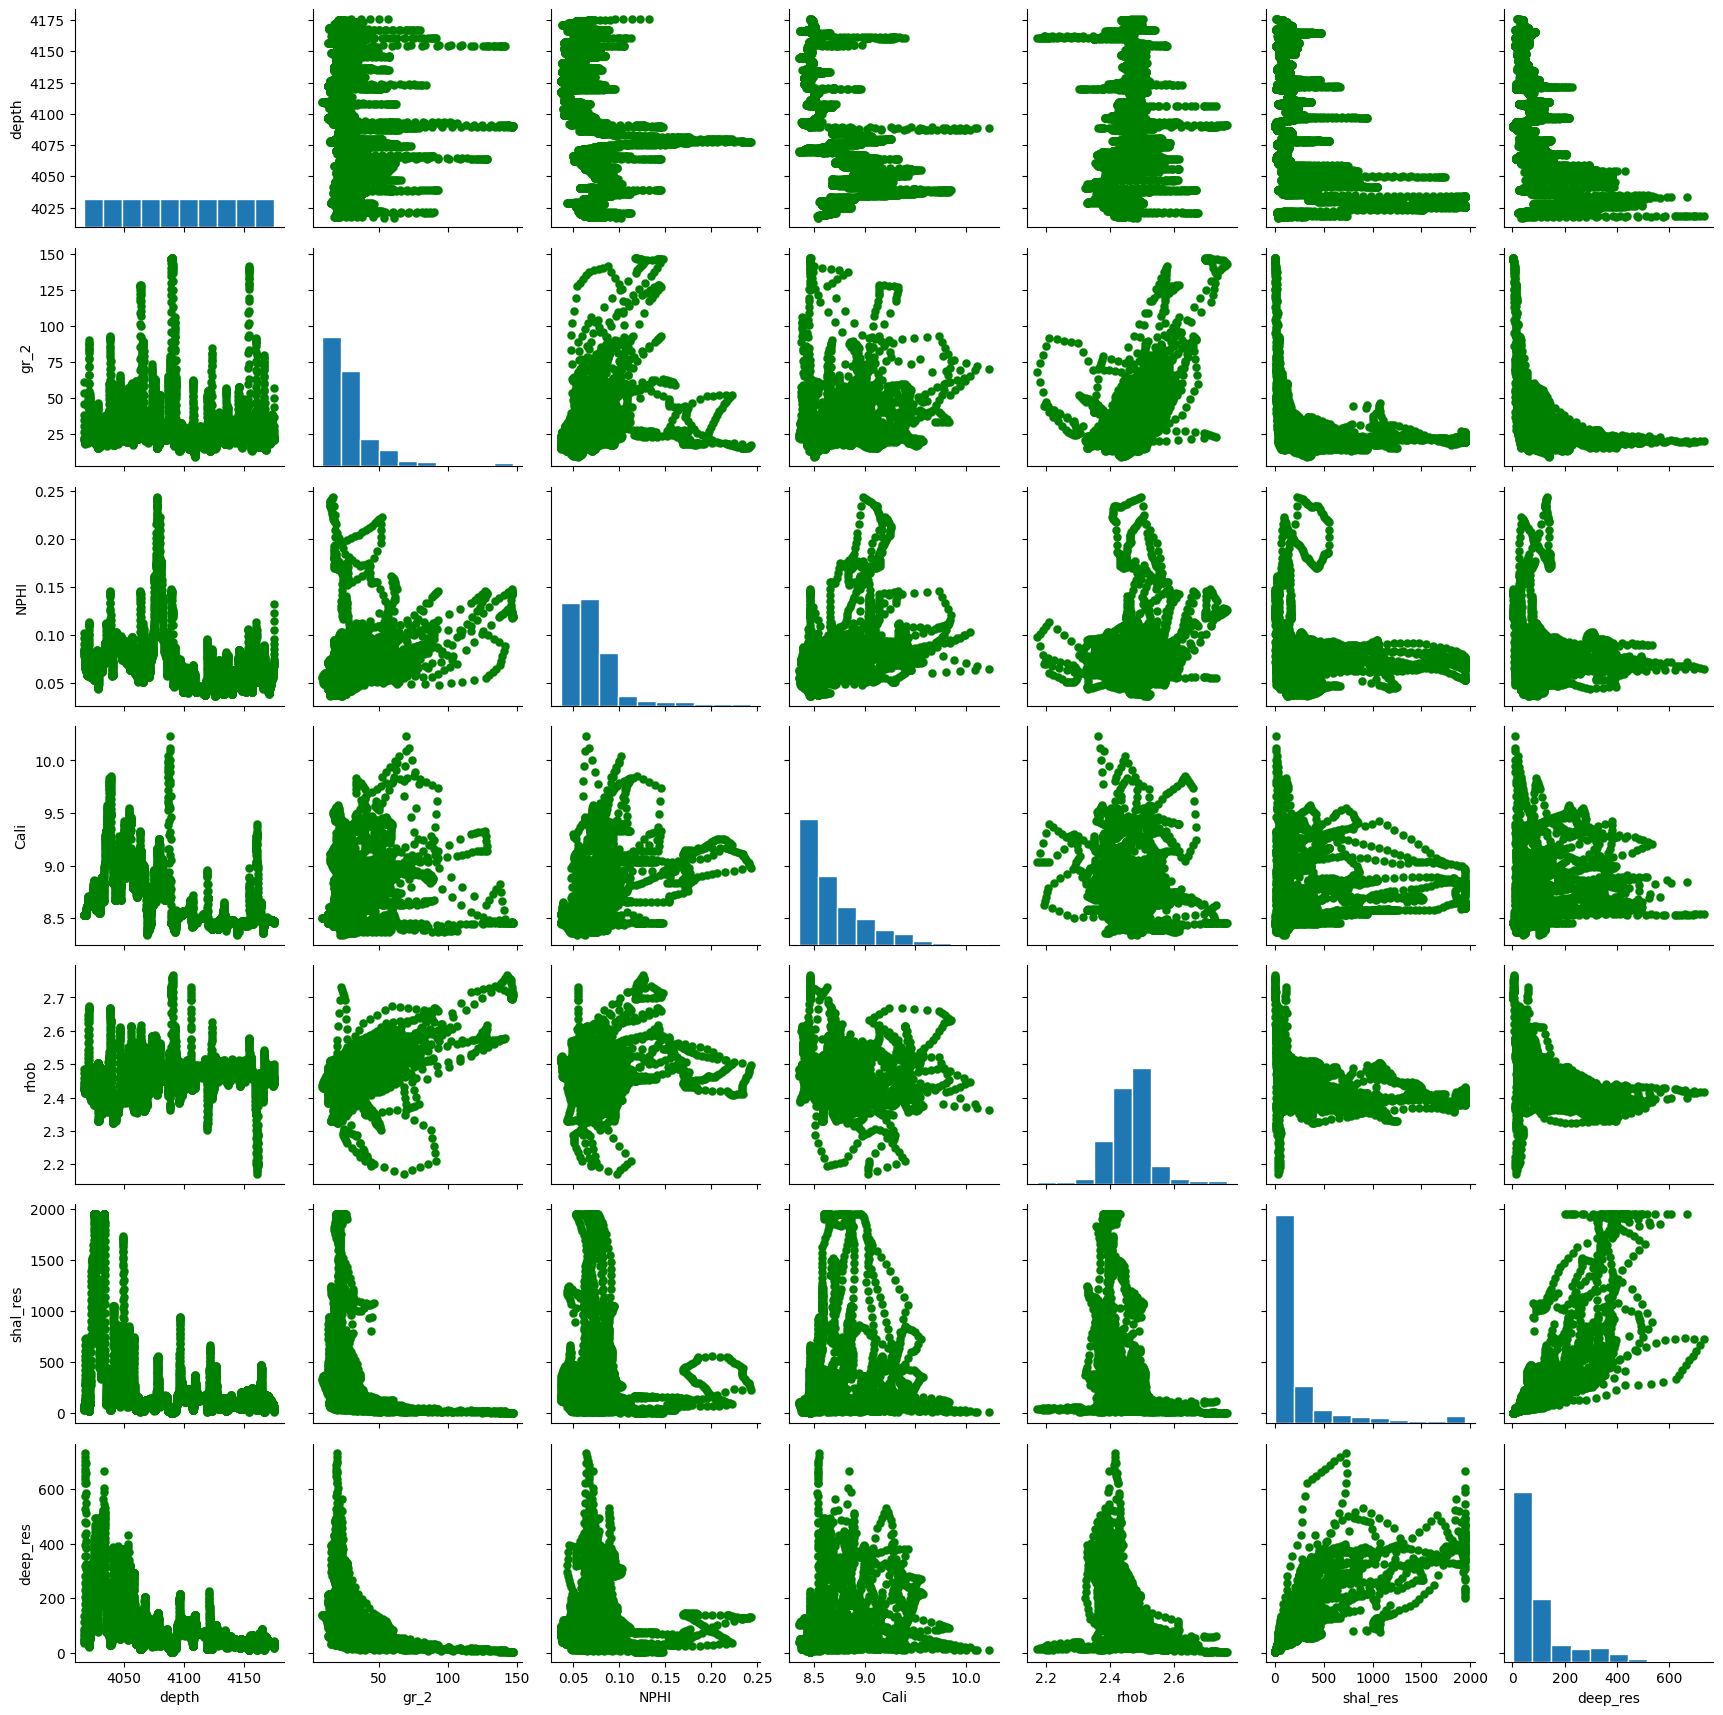

In [14]:
grid = sns.PairGrid(logs_df)
grid.map_diag(plt.hist, edgecolor='w')
grid.map_offdiag(plt.scatter, color='g', linewidth=0.1)
plt.savefig('pairgrid.png', dpi=250)



In [15]:
def triple_combo_log(top_depth, bottom_depth):

    logs = logs_df[(logs_df.depth >= top_depth) & (logs_df.depth <= bottom_depth)]

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), sharey=True)
    fig.suptitle("Triple-combo Log display", fontsize=24,color='green')
    fig.subplots_adjust(top=0.75, wspace=0.1)

    for axes in ax:
        axes.set_ylim(top_depth, bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)

    # First track GR, CALI, SP logs to display
    ax2 = ax[0].twiny()
    ax2.set_xlim(0, 16)
    ax2.spines['top'].set_position(('outward', 40))
    ax2.plot(logs.Cali, logs.depth, '--k', label="CALI (in)", color='orange')  # Change CALI color to orange
    ax2.set_xlabel('CALI(in)', color='orange')
    ax2.tick_params(axis='x', colors='orange')

    ax3 = ax[0].twiny()
    ax3.set_xlim(0, 250)
    ax3.spines['top'].set_position(('outward', 80))
    ax3.plot(logs.gr_2, logs.depth, '-g', label="GR (API)", color='blue')  # Change GR color to blue
    ax3.set_xlabel('GR(API)', color='blue')
    ax3.tick_params(axis='x', colors='blue')

    # Second track resistivity plot
    ax12 = ax[1].twiny()
    ax12.set_xlim(0.1, 1000)
    ax12.set_xscale('log')
    ax12.spines['top'].set_position(('outward', 40))
    ax12.plot(logs.deep_res, logs.depth, '-m', label="RESD (m.ohm)", color='green')  # Change RESD color to green
    ax12.set_xlabel('RESD(m.ohm)', color='green')
    ax12.tick_params(axis='x', colors='green')

    ax13 = ax[1].twiny()
    ax13.set_xlim(1, 10000)
    ax13.set_xscale('log')
    ax13.spines['top'].set_position(('outward', 0))
    ax13.plot(logs.shal_res, logs.depth, '-k', label="RESS (m.ohm)", color='purple')  # Change RESS color to purple
    ax13.set_xlabel('RESS(m.ohm)', color='purple')
    ax13.tick_params(axis='x', colors='purple')

    # Third track NPHI, RHO, DT display
    ax22 = ax[2].twiny()
    ax22.set_xlim(0, 0.6)
    ax22.invert_xaxis()
    ax22.spines['top'].set_position(('outward', 40))
    ax22.plot(logs.NPHI, logs.depth, '--k', label="NPHI (%)", color='red')  # Change NPHI color to red
    ax22.set_xlabel('NPHI(%)', color='red')
    ax22.tick_params(axis='x', colors='red')

    ax23 = ax[2].twiny()
    ax23.set_xlim(1.5, 2.95)
    ax23.spines['top'].set_position(('outward', 80))
    ax23.plot(logs.rhob, logs.depth, '-r', label="RHOB (g/cc)", color='brown')  # Change RHOB color to brown
    ax23.set_xlabel('RHOM(g/cc)', color='brown')
    ax23.tick_params(axis='x', colors='brown')
    plt.grid()
    plt.show()


/tmp/ipykernel_65630/4091582496.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(logs.Cali, logs.depth, '--k', label="CALI (in)", color='orange')  # Change CALI color to orange
/tmp/ipykernel_65630/4091582496.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  ax3.plot(logs.gr_2, logs.depth, '-g', label="GR (API)", color='blue')  # Change GR color to blue
/tmp/ipykernel_65630/4091582496.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-m" (-> color='m'). The keyword argument will take precedence.
  ax12.plot(logs.deep_res, logs.depth, '-m', label="RESD (m.ohm)", color='green')  # Change RESD color to green
/tmp/ipykernel_65630/4091582496.py:43: UserWarning: color is redundantly defined by the 'colo

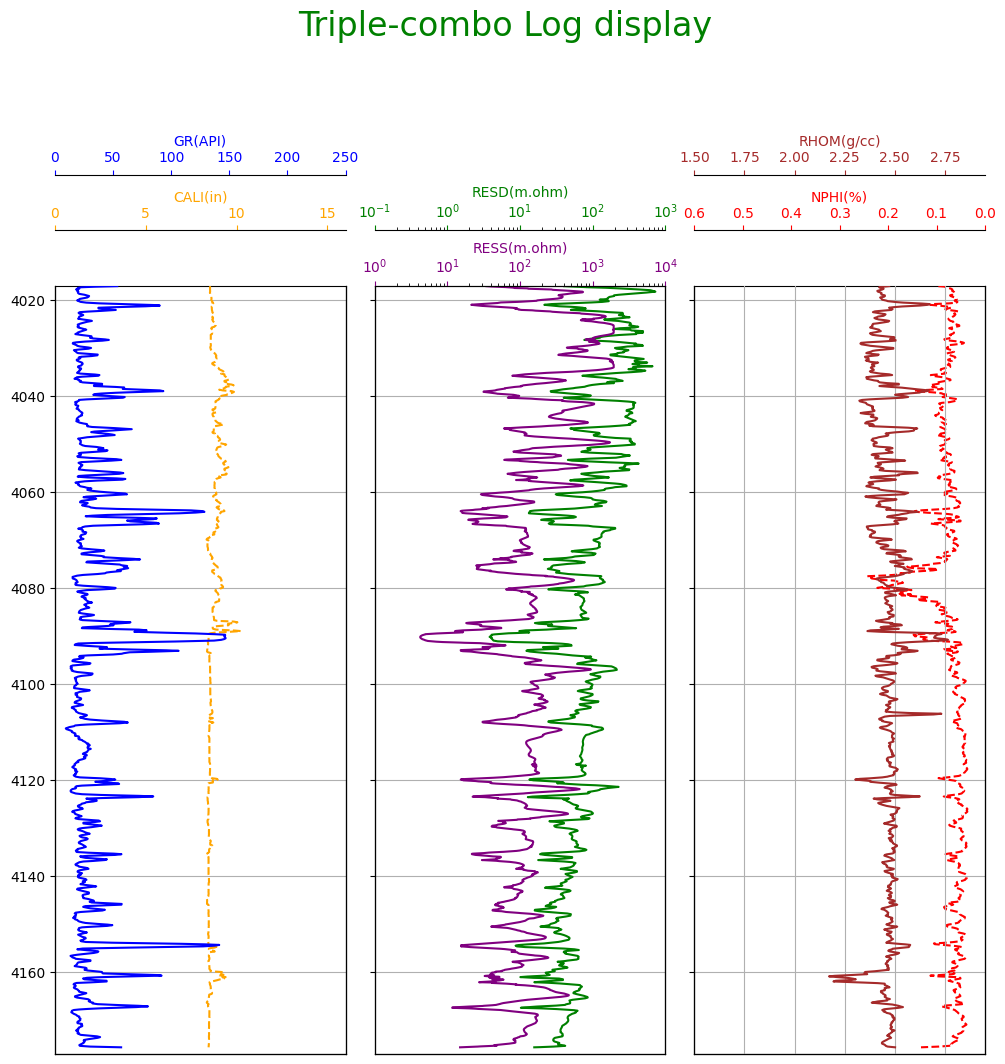

<Figure size 1100x1100 with 0 Axes>

In [16]:
top_depth = 4242.9
bottom_depth=4074.5
triple_combo_log(4017, 4177)
plt.savefig('Triple_combo_4017-4177png', dpi=250)

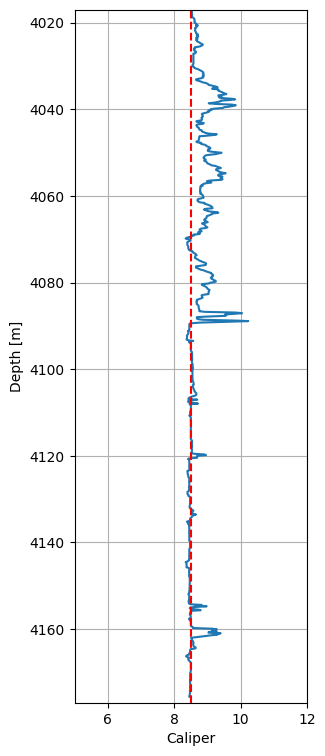

In [17]:
caliper = logs_df.Cali
bit_size = 8.5
difference = caliper - bit_size

plt.figure(1, figsize=(3, 9))
plt.subplot(111)
plt.plot(caliper, logs_df['depth'], label='Caliper')
plt.axvline(x=bit_size, color='red', linestyle='--', label='Bit Size: 8.5')
plt.ylim(4177, 4017)
plt.xlim(5, 12)
plt.xlabel('Caliper')
plt.ylabel('Depth [m]')
plt.grid()



QUESTION 3

In [18]:
def PHIDE(rho_log, rho_matrix, rho_fluid, rho_clay):
    PHID = (rho_matrix - rho_log) / (rho_matrix - rho_fluid)
    return PHID
#     PHID_clay = (rho_matrix - rho_clay) / (rho_matrix - rho_fluid)
#     PHID_clay_corr = PHID - Vclay * PHID_clay
#     return PHID_clay_corr

# def PHINE(neu_log, neu_clay, Vclay):
#     neu_log = neu_log - 0.028
#     PHIN_clay_corr = neu_log - (neu_clay * Vclay)
#     return PHIN_clay_corr

def PHIEXND(PHIDE, PHINE):
    PHI_ND = (PHIDE + PHINE) / 2.0
    return PHI_ND

def PHIEXND_gas_corr(PHIDE, PHINE):
    PHIEXND_gas_corr = ((PHIDE**2 + PHINE**2) / 2) ** 0.5
    return PHIEXND_gas_corr
logs_df.columns

Index(['depth', 'gr_2', 'NPHI', 'Cali', 'rhob', 'shal_res', 'deep_res'], dtype='object')

In [19]:
# Compute porosity based on supplied values of matrix, fluid and clay property
dt_matrix, dt_fluid, dt_clay, alpha = 55.6, 189, 110, 5/8
Bcp = 110/100
rho_matrix, rho_fluid, rho_clay = 2.65, 1.1, 2.4
neu_clay = 45

# logs['neu_log'] = logs['NEUT']  # Assuming NEUT is the neutron log
# PHIDT_clay(rho_matrix, rho_fluid, rho_clay)
# PHIST_clay(dt_matrix, dt_fluid, dt_clay)

# Calculate Total porosity and Effective porosity by looping though pandas

# logs['PHIDT'] = PHIDT(logs.RHOB, rho_matrix, rho_fluid)
logs_df['PHIDE'] = PHIDE(logs_df.rhob, rho_matrix, rho_fluid, rho_clay).clip(0,1)

# Sonic logs
# logs['PHIST']= PHIST(logs.DT, dt_matrix, dt_fluid, dt_clay)
# logs['PHISE_W'] = PHISE_W(logs.DT, dt_matrix, dt_fluid, Bcp, logs.Vclay, dt_clay).clip(0,1)

# logs['PHIST_rhg']= PHIST_rhg(logs.DT, dt_matrix, alpha, dt_clay)
# logs['PHISE_rhg'] = PHISE_rhg(logs.DT, dt_matrix, logs.Vclay, alpha, dt_clay).clip(0,1)

# Neutron logs
logs_df['PHINE'] = logs_df['NPHI']

# ND dual
logs_df['PHIEXND'] = PHIEXND(logs_df.PHIDE, logs_df.PHINE/100).clip(0,1)
logs_df['PHIEXND_gas_cor'] = PHIEXND_gas_corr(logs_df.PHIDE, logs_df.PHINE/100).clip(0,1)

# logs['PHINE']
# logs['PR']
# logs['calculate_Vclay']
# PHINE(0.169287,45,0.166737)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


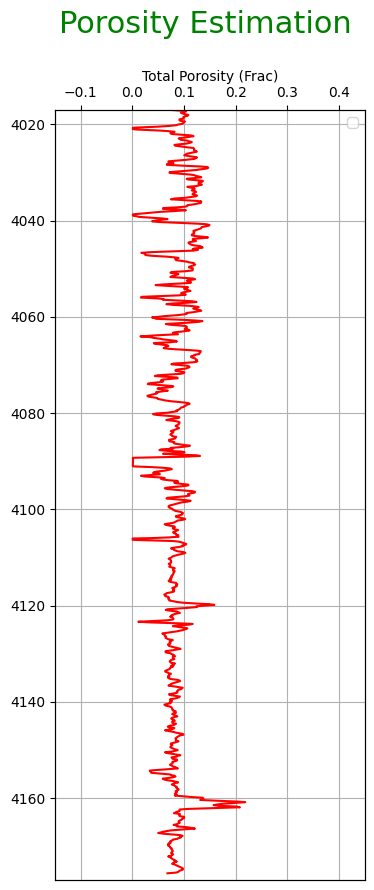

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,10), sharey=True)
fig.suptitle("Porosity Estimation", fontsize=22,color='green')

# Setting properties for the single subplot
ax.set_ylim(4017, 4177)
ax.invert_yaxis()
ax.yaxis.grid(True)
ax.get_xaxis().set_visible(False)

# Total porosity log
ax1 = ax.twiny()
ax1.set_ylabel('Depth [ft]')
ax1.set_xlim(-0.15, 0.45)
ax1.spines['top'].set_position(('outward', 0))
ax1.set_xlabel('Total Porosity (Frac)', color='k')
ax1.tick_params(axis='x', colors='k')
ax1.legend(loc='best')
ax1.grid(True)

# Plotting Total Porosity
ax1.plot(logs_df['PHIEXND_gas_cor'], logs_df['depth'], label='Total Porosity', color='red')

plt.savefig('Total porosity 4074-4140', dpi=250)
plt.show()

QUESTION 4

In [21]:


# Assuming logs_df is your DataFrame containing 'depth 1' and 'depth 2' columns
depth1_values = depth_1.unique()
depth2_values = depth_2.unique()

common_values = np.intersect1d(depth1_values, depth2_values)

len(common_values)
# dt_p


1041

In [22]:

# Assuming p1 is your DataFrame containing columns 'DEPTH', 'DTCO:1', and 'DTSM:1'
# Filter depth range
depth_range = (p1['DEPTH'] >= 4016.96) & (p1['DEPTH'] <= 4175.61)

# Calculate dt_p and create DataFrame
dt_p_values = 304800 / np.array(p1['DTCO:1'][depth_range])
dt_p_df = pd.DataFrame({'DEPTH': p1['DEPTH'][depth_range], 'dt_p': dt_p_values})

# Calculate dt_s and create DataFrame
dt_s_values = 304800 / np.array(p1['DTSM:1'][depth_range])
dt_s_df = pd.DataFrame({'DEPTH': p1['DEPTH'][depth_range], 'dt_s': dt_s_values})

print("dt_p DataFrame:")
print(dt_p_df)

print("\ndt_s DataFrame:")
print(dt_s_df)


dt_p DataFrame:
          DEPTH         dt_p
324   4017.1116  4502.364528
325   4017.2640  4450.933871
326   4017.4164  4409.407637
327   4017.5688  4460.716740
328   4017.7212  4437.614814
...         ...          ...
1360  4174.9980  4561.468452
1361  4175.1504  4568.432481
1362  4175.3028  4601.479639
1363  4175.4552  4539.169877
1364  4175.6076  4491.504375

[1041 rows x 2 columns]

dt_s DataFrame:
          DEPTH         dt_s
324   4017.1116  2575.405320
325   4017.2640  2598.272762
326   4017.4164  2605.384245
327   4017.5688  2662.848356
328   4017.7212  2675.115585
...         ...          ...
1360  4174.9980  2850.180460
1361  4175.1504  2859.496259
1362  4175.3028  2782.885542
1363  4175.4552  2729.363220
1364  4175.6076  2560.103189

[1041 rows x 2 columns]


In [23]:
# Assuming dt_p_df and dt_s_df are your DataFrames containing depth, dt_p, and dt_s values
# Assuming common_depth is your array containing common depth values

# Filter dt_p_df for common depth values
filtered_dt_p_df = dt_p_df[dt_p_df['DEPTH'].isin(common_values)]

# Filter dt_s_df for common depth values
filtered_dt_s_df = dt_s_df[dt_s_df['DEPTH'].isin(common_values)]

# Display the filtered DataFrames
print("Filtered dt_p DataFrame:")
print(filtered_dt_p_df)

print("\nFiltered dt_s DataFrame:")
print(filtered_dt_s_df)
filtered_dt_p_df.drop('DEPTH',axis=1,inplace=True)
filtered_dt_p_df
filtered_dt_s_df.drop('DEPTH',axis=1,inplace=True)
filtered_dt_s_df


Filtered dt_p DataFrame:
          DEPTH         dt_p
324   4017.1116  4502.364528
325   4017.2640  4450.933871
326   4017.4164  4409.407637
327   4017.5688  4460.716740
328   4017.7212  4437.614814
...         ...          ...
1360  4174.9980  4561.468452
1361  4175.1504  4568.432481
1362  4175.3028  4601.479639
1363  4175.4552  4539.169877
1364  4175.6076  4491.504375

[1041 rows x 2 columns]

Filtered dt_s DataFrame:
          DEPTH         dt_s
324   4017.1116  2575.405320
325   4017.2640  2598.272762
326   4017.4164  2605.384245
327   4017.5688  2662.848356
328   4017.7212  2675.115585
...         ...          ...
1360  4174.9980  2850.180460
1361  4175.1504  2859.496259
1362  4175.3028  2782.885542
1363  4175.4552  2729.363220
1364  4175.6076  2560.103189

[1041 rows x 2 columns]


,dt_s
324,2575.405320
325,2598.272762
326,2605.384245
327,2662.848356
328,2675.115585
...,...
1360,2850.180460
1361,2859.496259
1362,2782.885542
1363,2729.363220


In [24]:
#creating a new data frame for porosity
new_df_por = logs_df.loc[:, ['depth', 'PHIEXND_gas_cor']]
filtered_dt_por = new_df_por[new_df_por['depth'].isin(common_values)]
filtered_dt_por
filtered_dt_por.drop('depth',axis=1,inplace=True)


/tmp/ipykernel_65630/4096147313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dt_por.drop('depth',axis=1,inplace=True)


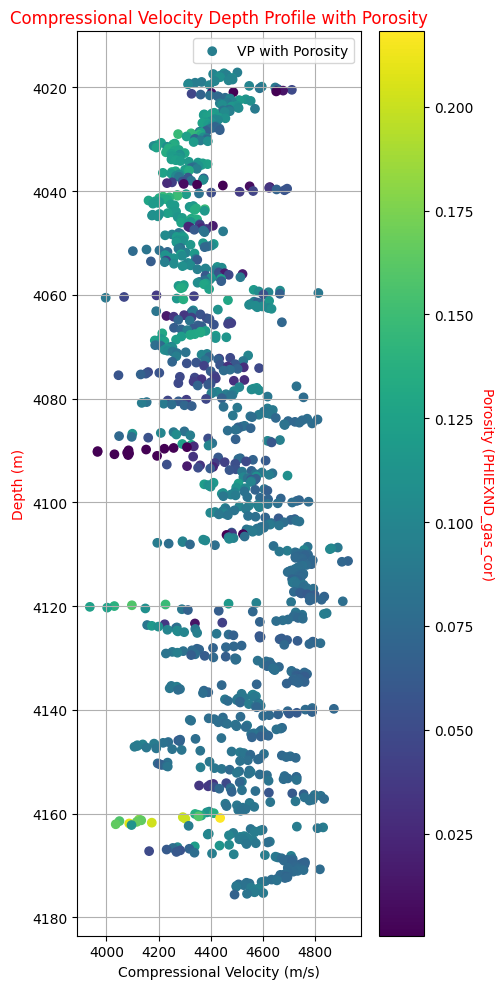

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 10))

scatter = ax.scatter(filtered_dt_p_df['dt_p'], common_values, c=filtered_dt_por['PHIEXND_gas_cor'], cmap='viridis', label='VP with Porosity')
ax.set_xlabel('Compressional Velocity (m/s)')
ax.set_ylabel('Depth (m)',color='red')
ax.invert_yaxis()

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Porosity (PHIEXND_gas_cor)', rotation=270, labelpad=15,color='red')

plt.title("Compressional Velocity Depth Profile with Porosity",color='red')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.savefig('Compressional Velocity Depth Profile with Porosity', dpi=250)

plt.show()



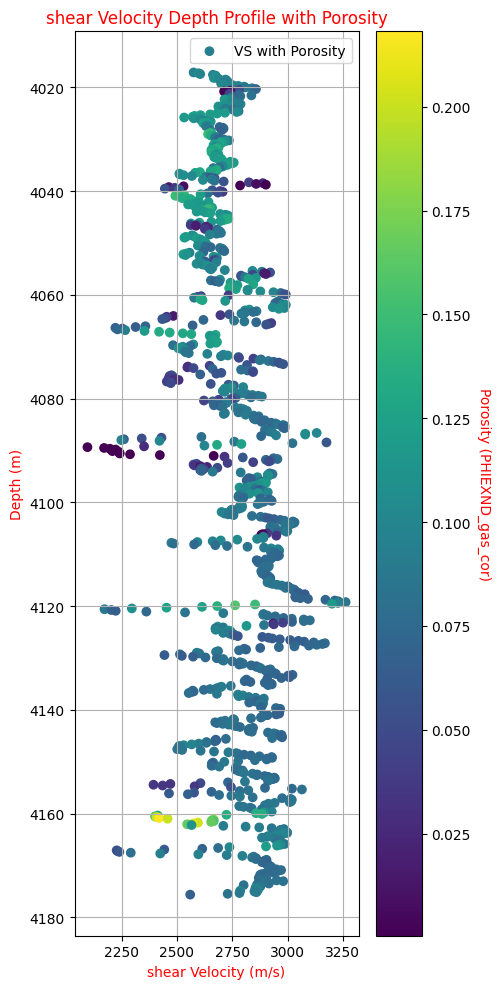

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 10))

scatter = ax.scatter(filtered_dt_s_df['dt_s'], common_values, c=filtered_dt_por['PHIEXND_gas_cor'], cmap='viridis', label='VS with Porosity')
ax.set_xlabel('shear Velocity (m/s)',color='red')
ax.set_ylabel('Depth (m)',color='red')
ax.invert_yaxis()

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Porosity (PHIEXND_gas_cor)', rotation=270, labelpad=15,color='red')

plt.title("shear Velocity Depth Profile with Porosity",color='red')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.savefig('shear Velocity Depth Profile with Porosity', dpi=250)

plt.show()



QUESTION 5

In [27]:
Rwa = 0.22 # water restivity from drill stem test
a = 1
m = 2
n = 2

In [28]:
def sw_archie(Rw, Rt, PHIE, a, m, n):
    F = a /(PHIE**m)
    Swa = (F * Rw/Rt)**(1/n)
    return Swa
logs_df

,depth,gr_2,NPHI,Cali,rhob,shal_res,deep_res,PHIDE,PHINE,PHIEXND,PHIEXND_gas_cor
429,4016.9973,61.231613,0.102041,8.535177,2.484471,32.016449,34.748028,0.106793,0.102041,0.053907,0.075517
430,4017.0354,53.598358,0.096209,8.535251,2.472094,34.567680,40.474403,0.114778,0.096209,0.057870,0.081163
431,4017.0735,45.965103,0.090377,8.535324,2.459716,38.008110,46.200783,0.122764,0.090377,0.061834,0.086810
432,4017.1116,38.331848,0.084545,8.535397,2.447338,41.448540,51.927158,0.130750,0.084545,0.065798,0.092456
433,4017.1497,34.341064,0.083529,8.535324,2.440942,49.092194,60.978439,0.134876,0.083529,0.067856,0.095374
...,...,...,...,...,...,...,...,...,...,...,...
4588,4175.4552,30.271370,0.095390,8.465088,2.464580,26.158501,29.043430,0.119626,0.095390,0.060290,0.084591
4589,4175.4933,36.930035,0.104567,8.463044,2.473814,22.642256,25.714958,0.113668,0.104567,0.057357,0.080379
4590,4175.5314,43.588699,0.113744,8.461000,2.483048,19.126011,22.386486,0.107711,0.113744,0.054424,0.076167
4591,4175.5695,50.247364,0.122921,8.458956,2.492283,17.052675,19.058012,0.101753,0.122921,0.051491,0.071955


In [29]:
Rw = Rwa
logs_df['Swa'] = sw_archie(Rw, logs_df.deep_res, logs_df.PHIEXND_gas_cor, a, m, n).clip(0,1)
logs_df['Swa'].describe()

count    4164.000000
mean        0.681865
std         0.272943
min         0.158043
25%         0.450836
50%         0.714883
75%         0.957772
max         1.000000
Name: Swa, dtype: float64

In [30]:
# Constants for Gamma Ray (GR) log method
GR_min = logs_df['gr_2'].min()  # Minimum Gamma Ray value
GR_max = logs_df['gr_2'].max()  # Maximum Gamma Ray value

# Calculate Volume of Shale (Vsh) using Gamma Ray (GR) log method
logs_df['Vsh_GR'] = (logs_df['gr_2'] - GR_min) / (GR_max - GR_min)
print("min value of gr : ",GR_min)
print("max value of gr :",GR_max)
print("mean value of gr : ",)


# Display the DataFrame with Vsh_GR
print(logs_df[['depth', 'gr_2', 'Vsh_GR']])
logs_df['Vsh_GR']

min value of gr :  9.31677818
max value of gr : 146.746505
mean value of gr : 
          depth       gr_2    Vsh_GR
429   4016.9973  61.231613  0.377755
430   4017.0354  53.598358  0.322213
431   4017.0735  45.965103  0.266670
432   4017.1116  38.331848  0.211127
433   4017.1497  34.341064  0.182088
...         ...        ...       ...
4588  4175.4552  30.271370  0.152475
4589  4175.4933  36.930035  0.200926
4590  4175.5314  43.588699  0.249378
4591  4175.5695  50.247364  0.297829
4592  4175.6076  56.906029  0.346281

[4164 rows x 3 columns]


429     0.377755
430     0.322213
431     0.266670
432     0.211127
433     0.182088
          ...   
4588    0.152475
4589    0.200926
4590    0.249378
4591    0.297829
4592    0.346281
Name: Vsh_GR, Length: 4164, dtype: float64

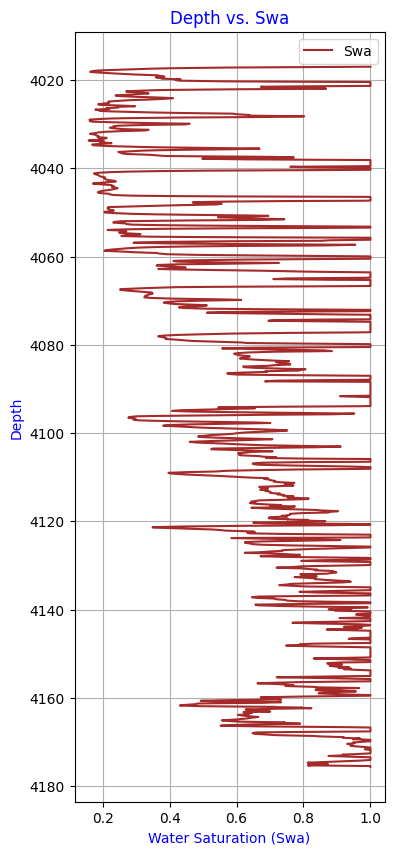

In [31]:
plt.figure(figsize=(4, 10))
plt.plot(logs_df['Swa'], logs_df['depth'], label='Swa', color='brown')


plt.xlabel('Water Saturation (Swa)',color='blue')
plt.ylabel('Depth',color='blue')
plt.title('Depth vs. Swa',color='blue')
plt.gca().invert_yaxis()

plt.grid(True)
plt.legend()
plt.savefig('water saturation', dpi=250)

plt.show()

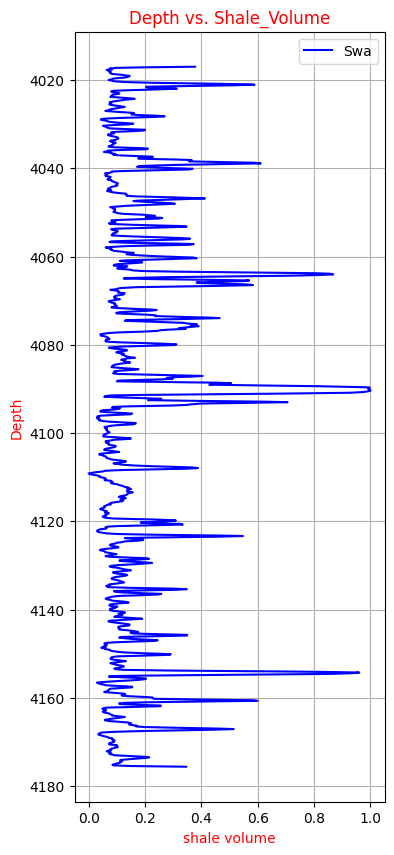

In [32]:
plt.figure(figsize=(4, 10))
plt.plot(logs_df['Vsh_GR'], logs_df['depth'], label='Swa', color='blue')


plt.xlabel('shale volume',color='red')
plt.ylabel('Depth',color='red')
plt.title('Depth vs. Shale_Volume',color='red')
plt.gca().invert_yaxis()

plt.grid(True)
plt.legend()
plt.savefig('Shale Volume', dpi=250)


plt.show()

In [33]:
# Assuming 'logs' is your DataFrame
logs_df['Reservoir_Flag'] = 0  # Initialize all values to 0

# Set Reservoir_Flag to 1 where conditions are met
logs_df.loc[(logs_df['Vsh_GR'] <= 0.4) & (logs_df['Swa'] <= 0.65), 'Reservoir_Flag'] = 1

# Print the DataFrame to verify the new column
print(logs_df[['depth', 'Vsh_GR', 'Swa', 'Reservoir_Flag']])

# Save the DataFrame with the new column
logs_df.to_csv('logs_with_reservoir_flag.csv', index=False)


          depth    Vsh_GR       Swa  Reservoir_Flag
429   4016.9973  0.377755  1.000000               0
430   4017.0354  0.322213  0.908366               0
431   4017.0735  0.266670  0.794912               0
432   4017.1116  0.211127  0.704011               0
433   4017.1497  0.182088  0.629789               1
...         ...       ...       ...             ...
4588  4175.4552  0.152475  1.000000               0
4589  4175.4933  0.200926  1.000000               0
4590  4175.5314  0.249378  1.000000               0
4591  4175.5695  0.297829  1.000000               0
4592  4175.6076  0.346281  1.000000               0

[4164 rows x 4 columns]


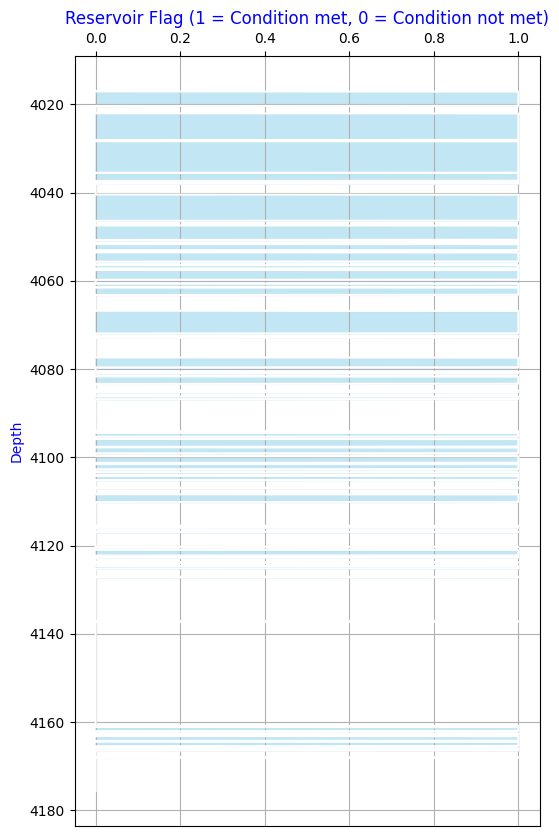

In [34]:



# Plotting the Reservoir Flag
plt.figure(figsize=(6, 10))
ax = plt.gca()
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.invert_yaxis()
plt.grid()

# Plotting the Reservoir Flag as a line
plt.plot(logs_df['Reservoir_Flag'], logs_df['depth'], color='white')

# Filling the area where the condition is met with color
plt.fill_betweenx(logs_df['depth'], logs_df['Reservoir_Flag'], color='skyblue', alpha=0.5)

# Adding labels and title
plt.ylabel("Depth",color='blue')
plt.title("Reservoir Flag (1 = Condition met, 0 = Condition not met)",color='blue')
plt.savefig('Flag.png', dpi=250)

plt.show()



questio 6

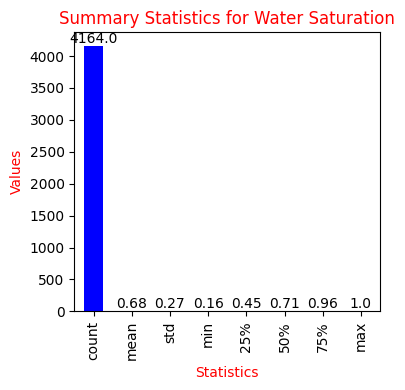

In [35]:
import matplotlib.pyplot as plt

# Assuming 'logs' is your DataFrame
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the statistics from describe() for 'Swa' column
stats_swa = logs_df['Swa'].describe()
bars = stats_swa.plot(kind='bar', ax=ax, color='blue')

# Adding labels and title
plt.xlabel('Statistics',color='red')
plt.ylabel('Values',color='red')
plt.title('Summary Statistics for Water Saturation',color='red')

# Adding annotations with values for each bar
for i, v in enumerate(stats_swa):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Save the plot as an image
plt.tight_layout()
plt.savefig('Swa_describe_plot.png', dpi=250)

plt.show()


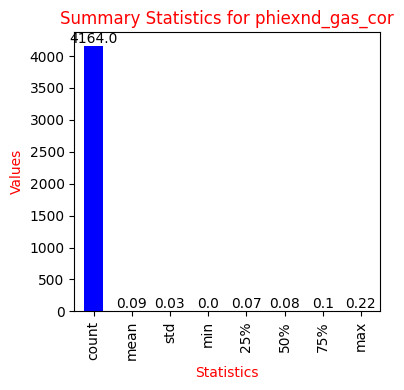

In [36]:
import matplotlib.pyplot as plt

# Assuming 'logs' is your DataFrame
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the statistics from describe() for 'Swa' column
stats_swa = logs_df['PHIEXND_gas_cor'].describe()
bars = stats_swa.plot(kind='bar', ax=ax, color='blue')

# Adding labels and title
plt.xlabel('Statistics',color='red')
plt.ylabel('Values',color='red')
plt.title('Summary Statistics for phiexnd_gas_cor',color='red')

# Adding annotations with values for each bar
for i, v in enumerate(stats_swa):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Save the plot as an image
plt.tight_layout()
plt.savefig('Swa_describe_plot.png', dpi=250)

plt.show()


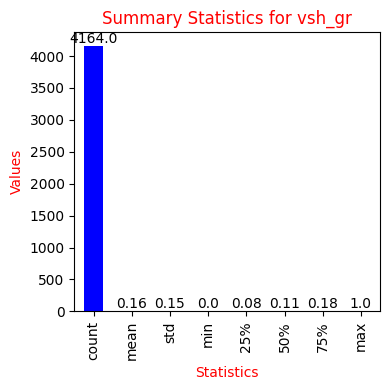

In [37]:
import matplotlib.pyplot as plt

# Assuming 'logs' is your DataFrame
fig, ax = plt.subplots(figsize=(4, 4))

# Plotting the statistics from describe() for 'Swa' column
stats_swa = logs_df['Vsh_GR'].describe()
bars = stats_swa.plot(kind='bar', ax=ax, color='blue')

# Adding labels and title
plt.xlabel('Statistics',color='red')
plt.ylabel('Values',color='red')
plt.title('Summary Statistics for vsh_gr',color='red')

# Adding annotations with values for each bar
for i, v in enumerate(stats_swa):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)

# Save the plot as an image
plt.tight_layout()
plt.savefig('Swa_describe_plot.png', dpi=250)

plt.show()


In [38]:
logs_df['Swa'].describe()

count    4164.000000
mean        0.681865
std         0.272943
min         0.158043
25%         0.450836
50%         0.714883
75%         0.957772
max         1.000000
Name: Swa, dtype: float64

In [39]:
logs_df['Vsh_GR'].describe()

count    4164.000000
mean        0.159872
std         0.151139
min         0.000000
25%         0.078419
50%         0.106735
75%         0.176229
max         1.000000
Name: Vsh_GR, dtype: float64

In [40]:
logs_df['PHIEXND_gas_cor'].describe()

count    4164.000000
mean        0.085072
std         0.027750
min         0.000389
25%         0.072831
50%         0.082739
75%         0.099890
max         0.218177
Name: PHIEXND_gas_cor, dtype: float64